# Perkenalan
---

Nama : Muhammad Afif Alvan

Batch : FTDS-016-rmt

Assigment : Mailstone 2 Phase 2

Judul : Cats vs Dogs

Obejctive : `Membuat model prediksi untuk mengetahui apakah sebuah gambar tersebut kucing ataupun anjing yang nantinya akan di gunakan KPKP untuk penanganan anjing liar di kota.`

---

# Import Libraries

In [1]:
# Akses folder
import os 
import glob 

# Data Load dan operasi Matematika
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import cv2 #Computer Vision


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # augmentasi
from sklearn.model_selection import train_test_split

# Data Modeling Neural Network
import tensorflow as tf 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.efficientnet_v2 import EfficientNetV2S
from keras.optimizers import adam_v2
from keras.layers import BatchNormalization
from keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input


# Model Evaluation
from sklearn.metrics import classification_report

# Model Inference
from google.colab import files

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

In [4]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 804M/814M [00:04<00:00, 233MB/s]
100% 814M/814M [00:04<00:00, 194MB/s]


In [5]:
!unzip -q /content/dogs-vs-cats-redux-kernels-edition.zip -d images

In [6]:
!unzip -q /content/images/train.zip -d images

In [7]:
!unzip -q /content/images/test.zip -d images

In [8]:
#Checking Folder
os.listdir('/content/images')

['train.zip', 'sample_submission.csv', 'test', 'train', 'test.zip']

In [9]:
# view folder images
main_path ='/content/images'
main_path

'/content/images'

In [10]:
# view train and test folder
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')

print(train_dir)

/content/images/train


In [11]:
# Checking Data train and test
print("Jumlah Data")
num_train = len(os.listdir(os.path.join(train_dir)))
num_test = len(os.listdir(os.path.join(test_dir)))

print(f'Total data Train : ',  num_train)
print(f'Total data Test : ', num_test)

Jumlah Data
Total data Train :  25000
Total data Test :  12500


- Diketahui terdapat `25000` data gambar pada folder train, dan `12500` data gambar pada data test.

In [12]:
# Label cat and dog
train_cat = glob.glob(train_dir +'/cat.*')
train_dog = glob.glob(train_dir+'/dog*')


print(f'Cat in train : ', len(train_cat))
print(f'Dog in train : ', len(train_dog))


Cat in train :  12500
Dog in train :  12500


- Diketahui pada data train, Jumlah gambar cat sebesar `12500` dan gambar dog sebesar `12500`.

In [13]:
# Function cat

def dataframes(list_of_images):
  data= []
  for image in list_of_images:
    data.append((image, 'cat'))
  return pd.DataFrame(data, columns=['images', 'label'])

train_cat_df = dataframes(train_cat)
train_cat_df = train_cat_df.sample(frac=1, random_state = 23).reset_index(drop=True)

In [14]:
# Function dog
def dataframe(list_of_images):
  data= []
  for image in list_of_images:
    data.append((image, 'dog'))
  return pd.DataFrame(data, columns=['images', 'label'])

train_dog_df = dataframe(train_dog)
train_dog_df = train_dog_df.sample(frac=1, random_state = 23).reset_index(drop=True)

In [15]:
# display shape and dataframe cat 
print(f'Shape of train_Cat',train_cat_df.shape)
train_cat_df.head()

Shape of train_Cat (12500, 2)


,images,label
0,/content/images/train/cat.756.jpg,cat
1,/content/images/train/cat.6291.jpg,cat
2,/content/images/train/cat.6603.jpg,cat
3,/content/images/train/cat.10344.jpg,cat
4,/content/images/train/cat.3945.jpg,cat


In [16]:
# Display Shape and DataFrame Dog
print(f'Shape of train_dog ', train_dog_df.shape)
train_dog_df.head()

Shape of train_dog  (12500, 2)


,images,label
0,/content/images/train/dog.130.jpg,dog
1,/content/images/train/dog.9054.jpg,dog
2,/content/images/train/dog.3483.jpg,dog
3,/content/images/train/dog.162.jpg,dog
4,/content/images/train/dog.4850.jpg,dog


In [17]:
# Concate Data
df_concat = pd.concat([train_cat_df, train_dog_df])
df = df_concat.sample(frac=1, random_state = 23).reset_index(drop = True)
df

,images,label
0,/content/images/train/cat.841.jpg,cat
1,/content/images/train/cat.5630.jpg,cat
2,/content/images/train/cat.5512.jpg,cat
3,/content/images/train/cat.6751.jpg,cat
4,/content/images/train/dog.10893.jpg,dog
...,...,...
24995,/content/images/train/cat.1482.jpg,cat
24996,/content/images/train/cat.11097.jpg,cat
24997,/content/images/train/cat.3145.jpg,cat
24998,/content/images/train/cat.11793.jpg,cat


- Disini dataframe untuk data train telah di buat, Yang mana nantinya akan digunakan sebagai permodelan.

# Exploratory Data Analysis (EDA)

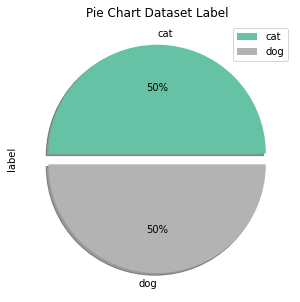

In [18]:
# Visualization Data
plt.figure(figsize=(8,5))
plt.title('Pie Chart Dataset Label')

df['label'].value_counts().plot(kind='pie', autopct='%.f%%',
                                cmap='Set2', explode=[0.05,0.05],
                                shadow = True)
plt.legend()

- Digunakan visualisasi menggunakan `pie chart` dikarenakan ingin mengetahui perbandingan dari komponen label dalam persentasi label tersebut dari keseluruhan data. 
- Diketahui pada visualisasi diatas data merupakan data `balance` dengan artian target data memiliki proporsi yang sama sehingga tidak perlu dilakukan balancing data. Namun jika data label adalah imbalance makan dapat diberikan pengecekan tergolong dalam imbalance yang seperti apa sehingga dapat diberi perlakuan untuk `balancing data`. 

sumber :
1. pie-chart --> https://lldikti5.kemdikbud.go.id/home/detailpost/9-jenis-chart-yang-dapat-anda-gunakan-untuk-visualisasi-data-dalam-presentasi-anda
2. balancing data --> https://medium.com/@rusnandifikri96/handling-imbalanced-dataset-260378b2a21b

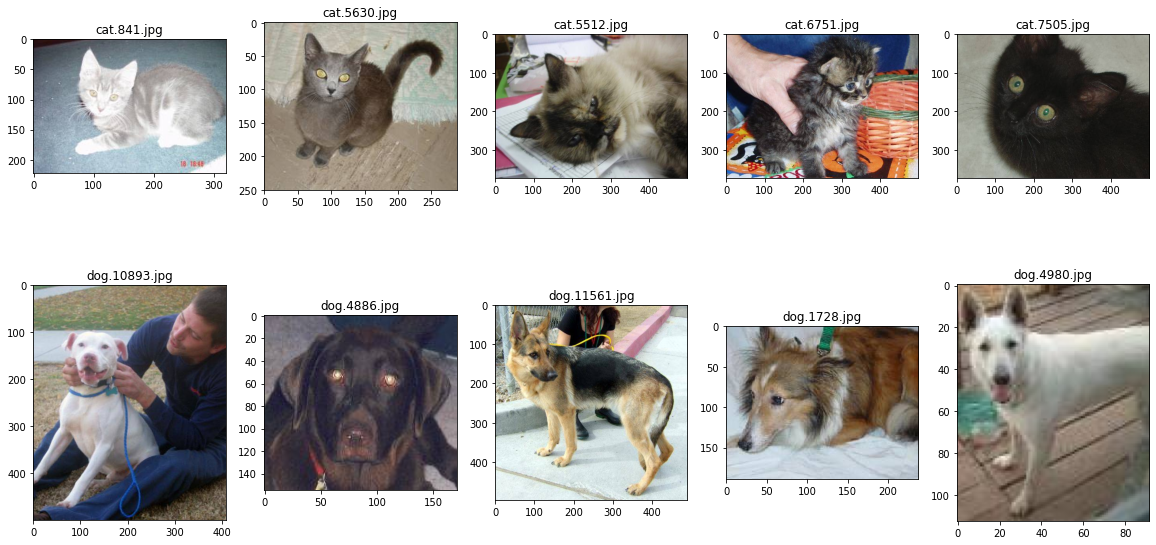

In [19]:
# Visualization

cat_sample = (df[df['label']=='cat']['images'].iloc[:5]).tolist()
dog_sample = (df[df['label']=='dog']['images'].iloc[:5]).tolist()


def visualize_samples(samples):
  fig, ax = plt.subplots(nrows=2, ncols=5, figsize= (20,10))
  for i, sample in enumerate(samples):
    img = cv2.imread(sample)
    ax[i//5, i%5].set_title(sample.split('/')[-1])
    ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

visualize_samples(cat_sample + dog_sample) 

**Analisis**
- Terlihat pada hasil diatas terdapat `5 kucing` (5 baris atas) dan `5 anjing` (5 baris bawah).
- Terlihat gambar hewan didalamnya tidak selalu simetris dan terlihat wajah dengan jelas.
- Terdapat beberapa jenis kucing dan anjing
- Berdasarkan personal judment, Ukuran rata-rata dari gambar sekitar 400x400.

# Preprocessing


## Splitting

In [20]:
# splitiing train, test val and create Dataframe
train, test = train_test_split(df, test_size = 0.15, random_state=123)
train, val = train_test_split(train, test_size = 0.15, random_state = 231)

train_df = pd.DataFrame(train).reset_index(drop=True)
test_df = pd.DataFrame(test).reset_index(drop=True)
val_df = pd.DataFrame(val).reset_index(drop=True)

print(f'Shape of train : ', train_df.shape)
print(f'Shape of test : ', test_df.shape)
print(f'Shape of val : ', val_df.shape)


Shape of train :  (18062, 2)
Shape of test :  (3750, 2)
Shape of val :  (3188, 2)


In [21]:
# Spliting x and y
x = df.drop(['label'], axis = 1)
y = df['label']

In [22]:
# spliting train test and val
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size = 0.15, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.15, random_state = 1223)

- Splitting data digunakan untuk pembuatan model, dimana model akan mempelajari data train dan mengimplementasikannya kepada data test, yang nantinya akan di evaluasi dengan data evaluasi.
- Dikarenan jumlah data yang sangat banyak, saya membagi setiap data dengan test_size 0.15. Agar model dapat berlatih lebih banyak.

## Encoding

In [23]:
# Create Dataframe
y_train = pd.DataFrame(y_train)
y_train

,label
23601,dog
13189,dog
14993,dog
7391,cat
9516,dog
...,...
21674,cat
12056,dog
12023,dog
19970,cat


In [24]:
# Encoding with Label Encoder
encode = LabelEncoder()
encode_df = encode.fit_transform(y_train['label'])
encode_df = pd.DataFrame(encode_df)
encode_df

,0
0,1
1,1
2,1
3,0
4,1
...,...
18057,0
18058,1
18059,1
18060,0


- Dilakukan encoding pad data y_train dikarenakan untuk mengevaluasi model menggunakan classification report. Sehingga bentuk string tidak dapat di hitung dengan int. Karena itu dilakukan Encoding menggunakan LabelEncoder. Tidak diberlakukannya OrdinalEncoder karena data memiliki class yang tidak bertingkat dan tidak merepresentasikan mana yang lebih tinggi valuenya.

# Augmentasi Data

Augmentasi data digunakan untuk mengubah shape atau ukuran pada gambar. Tujuannya adalah agar data dapat digeneralisasi dengan baik dan meminimalisir terjadinya `overfitting` pada data.

In [25]:
# Variable 
img_height = 150
img_width = 150 
SEED = 1
BATCH = 128


- `img_height dan img_widht` adalah ukuran dimana data gambar nanti akan di scaling menjadi 150x150
- `SEED` = 1 digunakan agar mencegah pseudo-random untuk pelatihan awal

- `batch` 128 diset agar data yang yang diproses kedalam neoron dibagi menjadi sebanyak 128.

sumber :

batch --> https://imam.digmi.id/post/memahami-epoch-batch-size-dan-iteration/

In [26]:
# Augmentasi data
train_dg = ImageDataGenerator(
    rescale = 1./255, # Menskala ulang
    rotation_range = 0.1, # Rotasi gambar
    width_shift_range = 0.2, # menggeser pelebaran gambar
    height_shift_range=0.2, # Menggeser ketinggian
    shear_range = 0.2, # Intensitas pergeseran
    zoom_range = 0.2, # zoom gambar
    horizontal_flip= True # mirror secara horizontal
)

val_dg = ImageDataGenerator(rescale=1./255)
test_dg = ImageDataGenerator(rescale=1./255)

- Dilihat dari EDA, contoh dari beberapa gambar memiliki ukuran yang berkisar antara 200-300. Sehingga untuk  ukurannya akan diubah menjadi 250x250 agar tidak memberatkan saat komputasi dan tidak terlalu kecil untuk pemrosesan data.
- Rescale diberikan nilai `1./255` yang mana setiap nilai dari data akan dikali dengan `1./255` sehingga data akan berentang antara 0-1. Sehingga memudahkan neural network saat belajar

**sumber :**

imagedatagenerator --> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [27]:
# create ds
ds_train = train_dg.flow_from_dataframe(
    dataframe = train_df,
    x_col ='images',
    y_col = 'label',
    target_size = (img_height, img_width), # Target ukuran
    class_mode ='binary', #Binary classification
    batch_size = BATCH, 
    shuffle = True, # Memberi kotak transit
    seed = SEED 
)

ds_test = test_dg.flow_from_dataframe(
    dataframe = test_df,
    x_col ='images',
    y_col = 'label',
    target_size = (img_height, img_width),
    class_mode ='binary',
    batch_size = BATCH,
    shuffle = False,
    seed = SEED
)

ds_val = val_dg.flow_from_dataframe(
    dataframe = val_df,
    x_col ='images',
    y_col = 'label',
    target_size = (img_height, img_width),
    class_mode ='binary',
    batch_size = BATCH,
    shuffle = False,
    seed = SEED
)

Found 18062 validated image filenames belonging to 2 classes.
Found 3750 validated image filenames belonging to 2 classes.
Found 3188 validated image filenames belonging to 2 classes.


- Jumlah data dalam setiap dataframe yang berhasil di validasi kedalam beberapa `2 class`

In [28]:
# vie class in data
ds_train.class_indices

{'cat': 0, 'dog': 1}

- Sekarang setiap data sudah di lakukan scaling dimana nilai 0 untuk category `cat` dan nilai 1 untuk `dog`

sumber :

rescale ->> https://structilmy.com/blog/2021/01/18/image-classification-dengan-cnn-dan-tensorflow/

flow parameter ->> https://medium.com/@hafizhan.aliady/membuat-klasifikasi-gambar-images-menggunakan-keras-tensorflow-tf-keras-dan-python-53f7ae953cea

Augmentation ->> https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/



# Model Definition

In [29]:
# Create Callback
callback_1 = [
    EarlyStopping(monitor ='val_loss', patience = 3),
    ModelCheckpoint('model1', monitor ='val_loss', save_best_only=True)
]

- Monitor yang digunakan adalah `val_loss` karena model ini bertujuan untuk meminimalisir kesalahan model dengan menggunakan `nilai validation loss terendah`

- patience digunakan untuk mengambil best model sebelum mengalami penurunan value sejumlah nilai patience. Untuk val_loss ketika valuenya naik sebanyak 3 kali maka akan di ambil nilai sebelum terjadi penaikan val_los.

- Earlystoping adalah memberhentikan model ketika telah mencapai nilai terbaik yang didasarkan pada `monitor` yang digunakan.

- ModelCheckpoint digunakan untuk menyimpan model setelah melakukan running sebanyak 1 epoch.

**sumber :**

monitor --> https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

patience --? https://medium.com/zero-equals-false/early-stopping-to-avoid-overfitting-in-neural-network-keras-b68c96ed05d9

callback --> https://medium.com/@aryarifqipratama/mengupas-tuntas-mengenai-apa-itu-callback-ce7bafc72173

earlystopping and checkpoint -- > https://ai.stackexchange.com/questions/31675/what-is-better-to-use-early-stopping-model-checkpoint-or-both

modelcheckpoint --> https://www.folkstalk.com/tech/model-checkpoint-keras-with-code-examples/

## Model Sequential

### Model Definition

In [30]:
input = [img_height, img_width,3]

# Model Sequential
model_seq = Sequential()

# Layer 1
model_seq.add(Conv2D(filters = 32, kernel_size = 3, 
                     activation='relu', input_shape=input))
model_seq.add(MaxPooling2D(pool_size = 2, strides =2))

# Layer 2
model_seq.add(Conv2D(filters = 64, kernel_size = 3 ,
                     activation='relu', padding = 'same'))
model_seq.add(MaxPooling2D(pool_size = 2, strides= 2))

model_seq.add(Flatten())
model_seq.add(Dense(units=128, activation= 'relu'))
model_seq.add(Dense(units=1, activation='sigmoid'))

- Model yang digunakan pada model default adalah sequential model. Dengan asumsi

- Strides merupakan parameter yang menentukan pergesaran dari scanning. Disini saya set dengan 2. Dengan asumsi nilai sides yang kecil akan membuat model semakin detail mengambil informasi dari sebuah output.

- Padding berguna untuk memberikan menyamakan nilai input dengan output. Pading `same` bermaksud memberikan nilai 0 di sekeliling input pada kanan kiri. 

- Pada output diberikan activation `sigmoid` karena cocok untuk binary classification. Jika data berupa multi-calss maka digunakan `softmax` untuk output.


sumber :


Model --> https://medium.com/@samuelsena/pengenalan-deep-learning-part-7-convolutional-neural-network-cnn-b003b477dc94

Padding --> https://wandb.ai/krishamehta/seo/reports/Difference-Between-SAME-and-VALID-Padding-in-TensorFlow--VmlldzoxODkwMzE

In [31]:
# display model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

Pada model seq yang dibangun memiliki 3 hidden layer  dimana setiap hidden layer dilakukan proses `convulution` dengan  `Max Pooling` untuk mengambil nilai tertinggi dari screaning yang dilakukan. 

Hidden layer yang 1 memiliki output sebanyak 148 nilai ini berasal dari input(150) yang dikurang 3(Nilai RGB) dan ditambah 1, sehingga output menjadi `74`. Bobot yang ditraining pada hidden layer 1 sebanyak `896`.
Hidden layaer kedua juga digunakan `maxpooling` sehingga output menjadi `37` dengan jumlah bobot yang di training sebanyak `18496`. 

Setelah mendapatkan output pada hidden layer kedua dilakukan flatten untuk mengubah matrix yang ada menjadi sebuah vektor tunggal. Sehingga output yang didapat sebanyak `87616`

Kemudian dilakukan `fully connected layer` kepada hidden layer ketiga dengan output `128` dan memiliki bobot yang di training sebesar `11.214.976`. Dan setelah itu ditraining kepada layer output terakhir yang memiliki 1 output binary classification. Jumlah bobot yang di training sebanyak `129`.

- Total params adalah jumlah bobot yang bisa di training.

- Trainable params adalah jumlah bobot yang di training.

nb : dikarenakan keterbatas waktu tidak dilakukan convulution dengan AvgPooling karena komputasi akan semakin berat.

Bobot output terjadi penambah 1 dari 128 ke 129 karena adanya neuron bias.


sumber :

convulution -- > https://www.megabagus.id/deep-learning-convolutional-neural-networks/6/

### Model Training

In [32]:
# compile model
model_seq.compile(optimizer='Adam', loss ='binary_crossentropy', metrics =['accuracy'])

- Digunakan optimizer Adam karena algoritma ini dapat memperbarui bobot secara iteratif yang didasarkan pada data training.
- loss digunakan binary crossentropy karena data merupakan binary classification.
- Metrics yang digunakan adalah accuracy, karena ingin melihat sejauh mana accuracy model mampu memprediksi mana kucing dan mana anjing.


sumber :

adam -- > https://medium.com/@saritilawah9/adam-optimizer-80cc267522af

In [33]:
# Training Model
%%time
history = model_seq.fit(ds_train, batch_size = BATCH,
                        epochs = 10, validation_data = ds_val,
                        callbacks = callback_1)

Epoch 1/10
142/142 [==============================] - ETA: 0s - loss: 0.7723 - accuracy: 0.5875

142/142 [==============================] - 142s 938ms/step - loss: 0.7723 - accuracy: 0.5875 - val_loss: 0.6417 - val_accuracy: 0.6349
Epoch 2/10
142/142 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.6658

142/142 [==============================] - 131s 920ms/step - loss: 0.6075 - accuracy: 0.6658 - val_loss: 0.5425 - val_accuracy: 0.7290
Epoch 3/10
142/142 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.6882

142/142 [==============================] - 131s 925ms/step - loss: 0.5833 - accuracy: 0.6882 - val_loss: 0.5171 - val_accuracy: 0.7425
Epoch 4/10
142/142 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.7154

142/142 [==============================] - 131s 923ms/step - loss: 0.5525 - accuracy: 0.7154 - val_loss: 0.4848 - val_accuracy: 0.7638
Epoch 5/10
142/142 [==============================] - ETA: 0s - loss: 0.5407 - accuracy: 0.7233

142/142 [==============================] - 130s 915ms/step - loss: 0.5407 - accuracy: 0.7233 - val_loss: 0.4781 - val_accuracy: 0.7660
Epoch 6/10
142/142 [==============================] - 129s 911ms/step - loss: 0.5292 - accuracy: 0.7340 - val_loss: 0.4817 - val_accuracy: 0.7535
Epoch 7/10
142/142 [==============================] - ETA: 0s - loss: 0.5074 - accuracy: 0.7497

142/142 [==============================] - 130s 914ms/step - loss: 0.5074 - accuracy: 0.7497 - val_loss: 0.4452 - val_accuracy: 0.7958
Epoch 8/10
142/142 [==============================] - ETA: 0s - loss: 0.4966 - accuracy: 0.7550

142/142 [==============================] - 130s 918ms/step - loss: 0.4966 - accuracy: 0.7550 - val_loss: 0.4414 - val_accuracy: 0.7870
Epoch 9/10
142/142 [==============================] - 130s 917ms/step - loss: 0.4849 - accuracy: 0.7640 - val_loss: 0.4528 - val_accuracy: 0.7842
Epoch 10/10
142/142 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.7702

142/142 [==============================] - 134s 945ms/step - loss: 0.4741 - accuracy: 0.7702 - val_loss: 0.4111 - val_accuracy: 0.8071
CPU times: user 23min 19s, sys: 19.7 s, total: 23min 38s
Wall time: 22min 11s


- Waktu yang di butuhkan untuk mentraining model selama `22 menit`

In [35]:
# Create DataFrame
history1_df= pd.DataFrame(history.history)
history1_df

,loss,accuracy,val_loss,val_accuracy
0,0.772277,0.587476,0.641696,0.634881
1,0.607494,0.665762,0.542499,0.728984
2,0.583343,0.688241,0.517052,0.742472
3,0.552488,0.715425,0.484837,0.763802
4,0.540699,0.723286,0.478083,0.765997
5,0.529178,0.734027,0.481724,0.753450
6,0.507390,0.749695,0.445170,0.795797
7,0.496584,0.755011,0.441449,0.787014
8,0.484929,0.764035,0.452822,0.784191
9,0.474097,0.770180,0.411135,0.807089


- Terlihat bahwa nilai dari running pada setiap epoch. Untuk accuracy tertinggi pada 77% dengan loss sebesar 0.4. Model ini tidak cukup baik karena nilai accuracy masih rendah.

### Model Evaluation

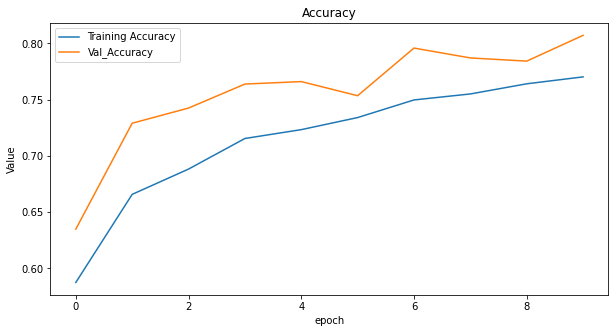

In [37]:
# plot accuracy model sequential

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Value')
plt.legend(loc = 'bottom right');

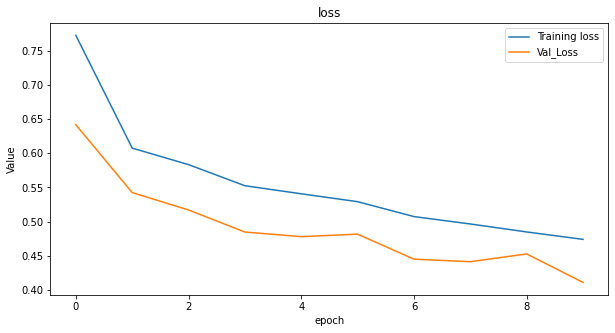

In [38]:
# plot loss

plt.figure(figsize=(10,5))
plt.plot (history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Val_Loss')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('Value')
plt.legend(loc = 'bottom right');

**ANALISIS :**

- Secara grafik nilai model sudah tergolong baik dimana nilai accuracy dan val accuracy perlahan naik setiap epoch nya. Serta nilai loss dan val_loss terus mengalami penurunan. Namun nilai yang diberikan untuk accuracy maupun loss masih tergolong rendah sehingga kesalahan prediksi antara kucing dan anjing masih besar. Hal tersebut karena model kurang melatih data. Sehingga akan diberikan penambahan epoch dengan pembentukan model baru.

In [39]:
# Classification report
y_pred_seq = model_seq.predict(ds_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
print(classification_report(ds_test.classes, y_pred_seq))

30/30 [==============================] - 10s 333ms/step
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1883
           1       0.80      0.83      0.82      1867

    accuracy                           0.81      3750
   macro avg       0.81      0.81      0.81      3750
weighted avg       0.81      0.81      0.81      3750



- Diperoleh hasil accuracy sebanyak 81%. Hal itu menandakan model mampu memprediksi antara kucing atau anjing dengan tingkat kebeneran prediksi 81%.

- Dilihat untuk nilai f1-score yang memprediksi bahwa data adalah anjing sebesar 82% ini belum cukup bagus untuk meminimalisir model memprediksi anjing padahal itu kucing. Sehingga dapat membingungkan anggota KPKP dalam melakukan penangkapan.

- Model perlu dilakukan training lebih banyak dengan beberapa detail agar model dapat memahami informasi yang diberikan lebih bagus lagi.



# Model Improve

Improve Model menggunakan Transfer learning dari model yang sudah ada di keras application.

In [40]:
# Create Callback
callback_2 = [
    EarlyStopping(monitor ='val_loss', patience = 4),
    ModelCheckpoint('model1', monitor ='val_loss', save_best_only=True)
]

### Model Definition

In [41]:
# Model Improve
model_improve = EfficientNetV2S(include_top = False, weights = 'imagenet',
                                input_shape=(150,150,3))

82420632/82420632 [==============================] - 0s 0us/step


Transfer learning yang diambil bersumber dari keras applications. Dipilih `EfficientNetV2S` Dikarenakan model yang memiliki accurasi tinggi sebesar 96.7% dan memiliki ukuran yang kecil sebesar 88 mb dibanding dengan `EfficientNetV2M dan EfficientNetV2L` yang memiliki ukuran jauh lebih besar baik dari parameter maupun ukuran model. Sedangkan hasil `accuracy` yang tidak terlalu jauh.
Pemilihan ini dapat meringankan komputasi dan menghemat waktu karena pembentukan model ini memiliki keterbatasan waktu.

intro : EfficientNetV2S memiliki ukuran 88 MB dengan top 5 accuracy sebsar 96.7 % dan parameter yang di training sebanyak 21.6 M

- include top di setting False agar bagian akhir dari model yaitu classificationnya akan dibuang karena kita akan membuat sendiri untuk bagian akhirnya. 

- Sedangkan bobotnya akan di training menggunakan `imagenet` sebagai default model.

sumber :

model --> https://keras.io/api/applications/

argument --> https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2M


In [42]:
# summary model Transfer learning EfficientNetV2S
model_improve.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 24)   648         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 24)   96          ['stem_conv[0][0]'

- Terlihat bahwa jumlah bobot yang di training sebesar `20.331.360`.  Didalamnya memiliki banyak sekali hidden layer dengan macam macam perlaukuan seperti `MaxPolling, BatchNormalization, dropout dll`

In [43]:
# Create Model Sequan Improve with transfer learning
input_new = model_improve.input
model_new = model_improve.output

model_new = Flatten()(model_new)
model_new = Dense(32, activation ='relu')(model_new)
model_new = Dropout(0.3)(model_new)
model_new = Dense(16, activation = 'relu')(model_new)

predictions = Dense(1, activation ='sigmoid')(model_new)

model_new = Model(inputs = model_improve.input, outputs = predictions)
model_new.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 24)   648         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 24)   96          ['stem_conv[0][0]']          

- Dengan mengambil model `EfficientNetV2S` yang bagian akhirnya di crop. Setelah itu model hasil dari transfer learning di flatten dan dilakukan fully connected layer dengan keterangan sebagai berikut:

- Hidden Layer pertama berisi 32 neuron dengan `1M` params yang di training dan diberikan dropout. serta pada hidden layer selanjutan memiliki 16 Neuron dengan 528 params yang di training. Neuron output adalah 1 dengan params sebanyak 17 yang ditambah dengan neuron bias.

- Total params yang di training adalah `21 M` ,

### Model Training

In [44]:
# creat
optimizer =  adam_v2.Adam(0.0003, beta_1= 0.9, beta_2 = 0.999, amsgrad = True)

- menggunakan optimizer adam_v2 dikarenakan ini adalah adam versi terbaru. Dengan argument yang digunakan untuk learning_rate sebesar 0.0003. Nilai beta_1 dan beta_2 adalah nilai default. Untuk amsgrad di gunakan TRUE karena model akan menerapkan varian AMSGrad dari algorima ini.

sumber :

adam --> https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [45]:
# Model Compile
model_new.compile(optimizer=optimizer, loss ='binary_crossentropy',
                  metrics =['accuracy'])

- metrics dan loss yang digunakan masih sama yaitu untuk loss `binary_crossentropy` dan metrics `accuracy`.

In [46]:
# Training Model
%%time
history_new = model_new.fit(ds_train, batch_size = BATCH,
                        epochs = 15, validation_data = ds_val,
                        callbacks = callback_2)

Epoch 1/15
142/142 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.8854

142/142 [==============================] - 279s 2s/step - loss: 0.2530 - accuracy: 0.8854 - val_loss: 0.1241 - val_accuracy: 0.9520
Epoch 2/15
142/142 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9627

142/142 [==============================] - 248s 2s/step - loss: 0.0991 - accuracy: 0.9627 - val_loss: 0.1029 - val_accuracy: 0.9617
Epoch 3/15
142/142 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9766

142/142 [==============================] - 249s 2s/step - loss: 0.0631 - accuracy: 0.9766 - val_loss: 0.0643 - val_accuracy: 0.9762
Epoch 4/15
142/142 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9756

142/142 [==============================] - 250s 2s/step - loss: 0.0644 - accuracy: 0.9756 - val_loss: 0.0545 - val_accuracy: 0.9784
Epoch 5/15
142/142 [==============================] - 175s 1s/step - loss: 0.0607 - accuracy: 0.9792 - val_loss: 0.0836 - val_accuracy: 0.9702
Epoch 6/15
142/142 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9843

142/142 [==============================] - 249s 2s/step - loss: 0.0433 - accuracy: 0.9843 - val_loss: 0.0443 - val_accuracy: 0.9834
Epoch 7/15
142/142 [==============================] - 175s 1s/step - loss: 0.0318 - accuracy: 0.9882 - val_loss: 0.0642 - val_accuracy: 0.9793
Epoch 8/15
142/142 [==============================] - 175s 1s/step - loss: 0.0310 - accuracy: 0.9889 - val_loss: 0.0570 - val_accuracy: 0.9806
Epoch 9/15
142/142 [==============================] - 174s 1s/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.0708 - val_accuracy: 0.9705
Epoch 10/15
142/142 [==============================] - 174s 1s/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0540 - val_accuracy: 0.9831
CPU times: user 49min 17s, sys: 4min 49s, total: 54min 7s
Wall time: 36min 20s


- Terlihat dengan adanya callback model dihentikan pada epoch ke 10 yang seharusnya pada epoch 10. Dengan pattience yang di set 4 memiliki artian. ketika nilai dari val_loss mengalamai kenaikan sebanyak 4 kali berturut-turut maka training model akan di hentikan dan mengamnil pada nilai sebelum terjadi penaikan.

- Waktu yang diperlukan untuk mentraining model improve ini selama `54 menit`.

In [47]:
# create DataFrame
history2_df= pd.DataFrame(history_new.history)
history2_df

,loss,accuracy,val_loss,val_accuracy
0,0.253004,0.885395,0.124093,0.952008
1,0.099103,0.962684,0.102873,0.961731
2,0.063103,0.976636,0.064312,0.976161
3,0.064400,0.975639,0.054474,0.978356
4,0.060690,0.979238,0.083634,0.970201
5,0.043321,0.984332,0.044263,0.983375
6,0.031805,0.988207,0.064195,0.979297
7,0.031039,0.988927,0.056955,0.980552
8,0.040902,0.986380,0.070783,0.970514
9,0.029637,0.990699,0.053958,0.983061


- Diketahui nilai dari setiap epochnya terlihat nilai accuracy tertinggi pada epoch ke 12 dan val_los terendah ada di epoch ke 12

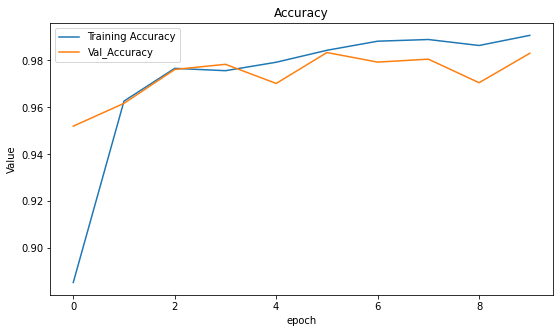

In [48]:
# plot accuracy

plt.figure(figsize=(9,5))
plt.plot(history_new.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label = 'Val_Accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Value')
plt.legend(loc = 'bottom right');

- Diketahui pada grafik hanya memiliki perbedaan antara accuracy dan val_accuracy hanya sekitar kurang dari 1%. Hal ini dikatakan mudel sudah bagus walau terdapat exploding pada val_accuracy


In [49]:
# Predic model new
y_pred_seq_new = model_new.predict(ds_test)
y_pred_seq_new = np.where(y_pred_seq_new >= 0.5, 1, 0)
print(classification_report(ds_test.classes, y_pred_seq_new))

30/30 [==============================] - 20s 570ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1883
           1       0.97      0.98      0.98      1867

    accuracy                           0.98      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.98      0.98      0.98      3750



**ANALISIS**

- Dilihat pada grafik bahwa model improve memiliki nilai yang `goodfit`. Dikarenakan perbedaan antara accuracy dengan val_accuracy sekitar 1%. Dan juga untuk nilai f1-score pada predicti model memiliki nilai yang tinggi yaitu `0.98` Dengan accuracy yang didapat juga `98%`.  Dibandingkan dengan model tanpa improve dengan transfer learning. Model Improve ini memiliki peningkatan yang signifikan. Hal tersebut dikarenakan penambahan params dari model `ElasticNetV2S` dan penambah input. Perubahan optimizer juga mempengaruhi peningkatan model.
- Peningkatan model juga diakibatkan dari penambahan params yang tadinya `20M` menjadi `21M`.

- Model mampu memprediksi kucing atau anjing dengan tingkat accuracy 98% Dimana ini akan sangat membantuk KPKP dalam mendeteksi mana anjing dan kucing Untuk penanganan anjing liar di suatu kota.

# Model Saving

In [50]:
# Model Saving
model_new.save('model_new.h5')

# Model Inference

Saving 4.jpg to 4.jpg
1/1 [==============================] - 0s 35ms/step
[[0.]]
dog


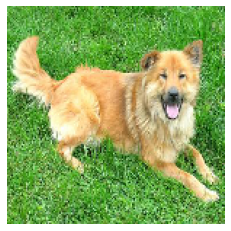

In [55]:
# create inference from upload data
from google.colab import files
uploaded = files.upload()

for i in uploaded.keys():
  path = i
  img = image.load_img(path, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('Off');
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis= 0)

  images = np.vstack([x])
  classes = model_new.predict(images)
  print(classes)
  if classes[0][0] == 1:
    print('cat')
  else:
    print('dog')

- Terlihat penggunaan model pada data salah satu gambar yang belum pernah diketahui oleh model. Model mampu memprediksi dengan benar kalau gambar tersebut adalah se ekor anjing. Dengan Demikian model ini dapat membantu anggota KPKP untuk menangani anjing liar yang berkeliaran di suatu kota.


#### Kesalahan Predict

Saving 25.jpg to 25.jpg
1/1 [==============================] - 0s 35ms/step
[[0.]]
dog


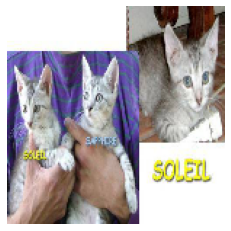

In [52]:
# Model dengan banyak hewan
uploaded = files.upload()
for i in uploaded.keys():
  path = i
  img = image.load_img(path, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('Off');
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis= 0)

  images = np.vstack([x])
  classes = model_new.predict(images)
  print(classes)
  if classes[0][0] == 1:
    print('cat')
  else:
    print('dog')
    

- Model akan salah prediksi ketika terdapat lebih dari 1 hewan, hal ini karena data training hanya sedikit yang memiliki gambar hewan banyak di dalam 1 frame. 

Saving 34.jpg to 34.jpg
1/1 [==============================] - 0s 33ms/step
[[0.]]
dog


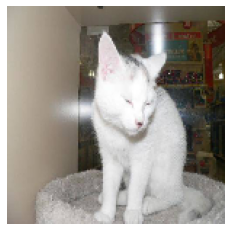

In [54]:
# Model dengan birghtness tinggi
uploaded = files.upload()
for i in uploaded.keys():
  path = i
  img = image.load_img(path, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('Off');
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis= 0)

  images = np.vstack([x])
  classes = model_new.predict(images)
  print(classes)
  if classes[0][0] == 1:
    print('cat')
  else:
    print('dog')

- Model tidak dapat memprediksi gambar dengan brightness tinggi sehingga gambar nampak tidak terlalu jelas pada bagian wajah sehingga model salah memprediksi. Hal ini karena pada augmentasi tidak diberikan contoh data dengan brightness tertentu jadi model tidak memahami gambar tersebut.

# Kesimpulan

Data ini berisikan sekumpulan gambar anjing dan kucing. Dimana terdapat 12.500 data kucing dan 12.500 data anjing. Data ini tergolong data yang balance antar labelnya.  Isi gambar dalam dataset ini bermacam-macam bentuknya mulai dari brightness gambar yang terlalu tinggi, wajah tidak terlalu jelas dan tidak simetris. Rata-rata ukuran gambar adalah 400x400. Dengan dominat warna dari setiap gambar yang berbeda. Pada gambar kucing pertama dominant warna adalah warna gelap dan gambar anjing pertama memiliki dominan warna cahaya bayangan kuning.

Data di splitting menjadi train, test dan validation.
Data dilakukan augmentasi yang terdiri dari beberapa argumen seperti rescale menjadi 1./255, rotation_range menjadi 0.1, widht dan heught shift range sebanyak 0.2, shear range sebanyak 0.2, zoom_range sebanyak 0.2 dan dilakukan horizontal flip.
Dilakukan pelabelan data dan diapatkan hasil 0 untuk cat, dan 1 untuk dog.

Setalah data selesai di preprocessing, kemudian pembentukan model dilakukan. Disini digunakan callback dengan early stoping ketika `val_loss` mengalami kenaikan sebanyak 3 kali untuk default dan improve dengan patience 4. Model dibuat berdasarkan model sequential.

 Model pertama menggunakan 3 hidden layer dengan maxpooling dengan pool_size 2 dan strides 2. Diberikan padding `same` pada layer ini. activation yang digunakan adalah relu untuk hidden layer dan sigmoid untuk output layer.
Params yang di training sebanyak `11M` params. Model default ini menggunakan optimizer `Adam` dengan loss `binary_crossentropu` dan metrics `accuracy`.

Diapatkan hasil pada model evaluatin bahwa secara grafik val_accuracy dan accuracy memiliki nilai yang bagus yaiitu sama-sama mengalami peningkatan, namun value yang diberikan masih. Dilihat pada classification report model default hanya mampu memprediksi dengan accuracy 81% dam f1-score 82%. Hal ini dikarenakan training data yang kurang. Hasil ini tidak cukup bagus sehingga perlu dilakukan model improvement.

Pada model improvement diguanakn transfer learning dari keras application dengan nama model `EfficientNetV2S`  yang memiliki params `20M` yang ditambahkan fully connected layer buatan pribadi dan params yang di training menjadi sebanyak `21 M`. namun dengan adanya callback data berenti pada epoch ke 10 yang menandakan pada epoch tersebut model terlah mendapatkan val_loss terendah. Sehingga setelah di cek pada classification report model mampu memprediksi antara kucing dan anjing dengan accuracy sebesar 98%. Kesalahan model saat menebak class 1 juga kecil, dapat dicek pada f1-score yang memiliki nilai 98% dengan artian hanya 2% model akan salah predict mana anjing dan mana kucing. 

Model mengalami kesalahan predict ketika terdapat lebih dari 1 hewan pada gambar. Hal ini tidak dipahami model karena data training sedikit yang memiliki jumlah gambar dengan lebih dari 1 hewan.
Kesalahan juga terjadi karena brightness gambar yang terlalu tinggi, hal ini disebabkan karena augmentasi tidak dilakukan untuk pengaturan brightness dikarenakan keterbatasan waktu.


Model ini akan sangat membantu para anggota KPKP untuk memprediks apakah itu anjing atau kucing. Sehingga untuk penanganan anjir liar di kota akan semakin baik lagi.